         Date      Open     High     Low    Close   Volume
0  31-Mar-2021  2124.00  2124.00  2045.0  2083.90  1808625
1  30-Mar-2021  2005.00  2158.95  1990.0  2130.00  2339287
2  26-Mar-2021  1985.00  2007.55  1963.0  1979.95   677396
3  25-Mar-2021  1984.50  1999.00  1945.6  1969.40  1203406
4  24-Mar-2021  2007.85  2039.10  1960.1  1975.35  1287620

****
             Date    Open    High     Low   Close  Volume
2970  09-Apr-2009  250.0  259.45  240.00  243.50  140273
2971  08-Apr-2009  237.0  254.60  226.00  245.40  172563
2972  06-Apr-2009  226.7  246.00  222.15  241.10  347268
2973  02-Apr-2009  219.3  229.40  217.00  220.30  233824
2974  01-Apr-2009  212.5  219.80  210.00  215.35  148023
_________________________________________________________

OPEN 
	Average :  834.9961344537791 
	Maximum :  2124.0 
	Minimum :  212.5 
	Standard Deviation :  374.220681902014


HIGH 
	Average :  849.7883865546181 
	Maximum :  2158.95 
	Minimum :  219.8 
	Standard Deviation :  380.32082821640444



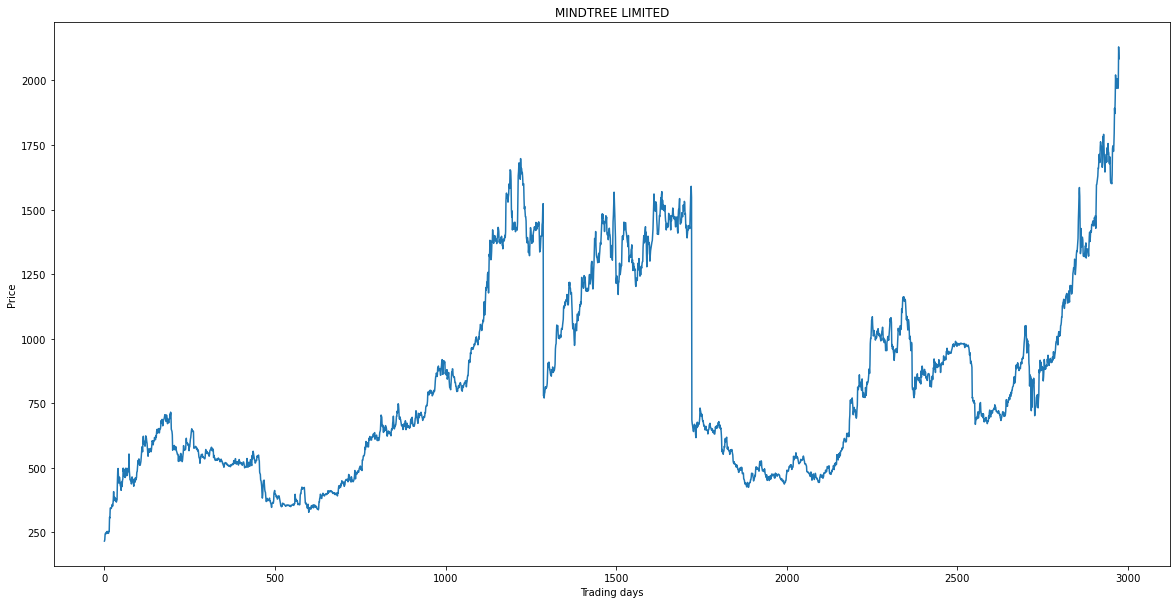

In [9]:
import numpy as np
import pandas as pd

df = pd.read_excel("/home/shravan/Desktop/Datasets/IT/mt/mt.xlsx")

print(df.head())
print("\n****\n",df.tail())

print("_________________________________________________________\n\nOPEN \n\tAverage : ",np.mean(df.loc[:]['Open']),"\n\tMaximum : ", np.max(df['Open']),"\n\tMinimum : ", np.min(df['Open']),"\n\tStandard Deviation : ", np.std(df['Open']))
print("\n\nHIGH \n\tAverage : ",np.mean(df.loc[:]['High']),"\n\tMaximum : ", np.max(df['High']),"\n\tMinimum : ", np.min(df['High']),"\n\tStandard Deviation : ", np.std(df['High']))
print("\n\nLOW \n\tAverage : ",np.mean(df.loc[:]['Low']),"\n\tMaximum : ", np.max(df['Low']),"\n\tMinimum : ", np.min(df['Low']),"\n\tStandard Deviation : ", np.std(df['Low']))
print("\n\nCLOSE \n\tAverage : ",np.mean(df.loc[:]['Close']),"\n\tMaximum : ", np.max(df['Close']),"\n\tMinimum : ", np.min(df['Close']),"\n\tStandard Deviation : ", np.std(df['Close']))
print("\n\nVOLUME \n\tAverage : ",np.mean(df.loc[:]['Volume']),"\n\tMaximum : ", np.max(df['Volume']),"\n\tMinimum : ", np.min(df['Volume']),"\n\tStandard Deviation : ", np.std(df['Volume']))

def reverse_data(df):
    date = []
    day = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    for i in range(len(df)-1, -1, -1):
        day.append((len(df)-1)-i)
        date.append(df.loc[i]['Date '])
        open.append(df.loc[i]['Open'])
        high.append(df.loc[i]['High'])
        low.append(df.loc[i]['Low'])
        close.append(df.loc[i]['Close'])
        volume.append(df.loc[i]['Volume'])
    stocks = pd.DataFrame()
    stocks['Day'] = day
    stocks['Date'] = date
    stocks['Open'] = open
    stocks['High'] = high
    stocks['Low'] = low
    stocks['Close'] = close
    stocks['Volume'] = volume
    return stocks

stocks = reverse_data(df)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("MINDTREE LIMITED")
plt.show()

   Day         Date      Open      High       Low     Close    Volume
0    0  01-Apr-2009  0.000000  0.000000  0.000000  0.000000  0.011043
1    1  02-Apr-2009  0.003557  0.004951  0.003815  0.002585  0.017453
2    2  06-Apr-2009  0.007429  0.013511  0.006621  0.013449  0.025929
3    3  08-Apr-2009  0.012817  0.017946  0.008719  0.015695  0.012877
4    4  09-Apr-2009  0.019618  0.020447  0.016349  0.014702  0.010464

****
        Day         Date      Open      High       Low     Close    Volume
2970  2970  24-Mar-2021  0.939236  0.938195  0.953733  0.919228  0.096183
2971  2971  25-Mar-2021  0.927021  0.917515  0.945831  0.916120  0.089891
2972  2972  26-Mar-2021  0.927282  0.921925  0.955313  0.921631  0.050593
2973  2973  30-Mar-2021  0.937745  1.000000  0.970027  1.000000  0.174754
2974  2974  31-Mar-2021  1.000000  0.981977  1.000000  0.975922  0.135108


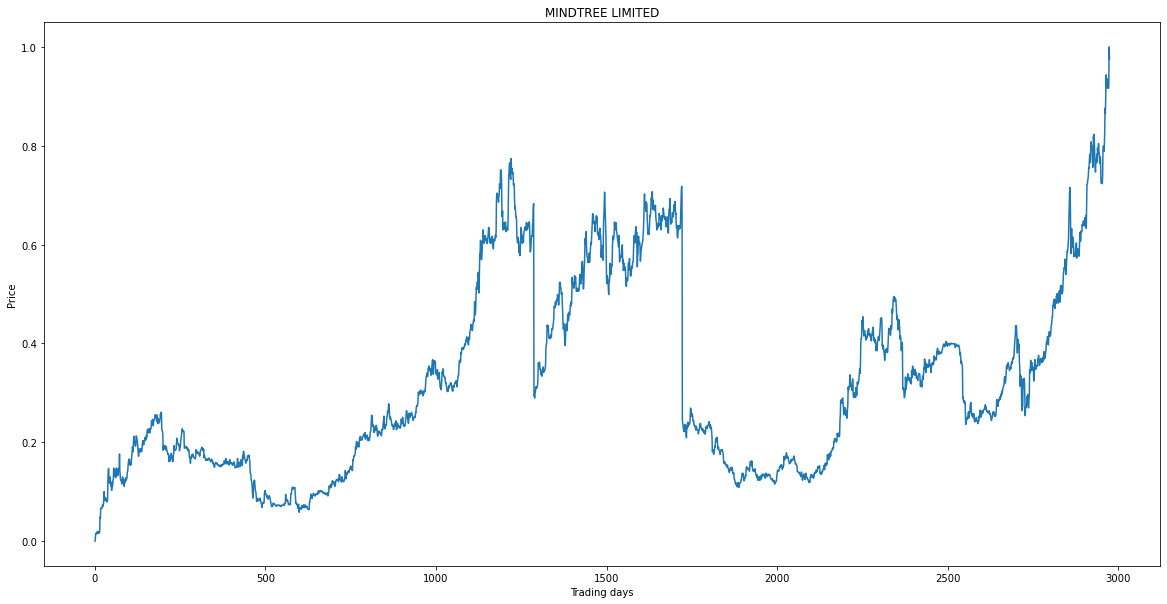

In [10]:
from sklearn.preprocessing import MinMaxScaler

def get_normalised_data(data):
    scaler = MinMaxScaler()
    numerical = ['Open','High','Low','Close','Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

stocks = get_normalised_data(stocks)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("MINDTREE LIMITED")
plt.show()

In [11]:
import math
from IPython.display import display
import time
from keras.layers.core import Dense,Dropout,Activation
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.layers.recurrent import SimpleRNN

#UNROLL_FUNCTION
def unroll(stocks,unroll_length):
    result = []
    for i in range(len(stocks)-unroll_length+1):
        result.append(stocks[i : (i+unroll_length)])
    return np.asarray(result)

#SIMPLERNN_MODEL
def build_model(input_dim,output_dim,return_sequences):
    model = Sequential()
    model.add(SimpleRNN(input_shape = (None,input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(Dropout(0.1))
    model.add(SimpleRNN(units = 100, return_sequences = False))
    model.add(Dense(units = 100))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model

#LSTM_MODEL
def build_lstm_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(LSTM(input_shape = (None, input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(LSTM(units = 128, return_sequences = False))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


#GRU_MODEL
def build_gru_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(GRU(input_shape = (None,input_dim), units = output_dim, return_sequences=return_sequences))
    #model.add(Dropout(0.2))
    model.add(GRU(units=128,return_sequences = False))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


def plot_prediction(actual, prediction, title='MINDTREE TRADING VS PREDICTIONS', y_label='Price INR', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values
    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()


#RESULT_STAT_FUNCTION
def err_stat(y_test,preds):
    Error = preds - y_test
    print("Standard Deviation of Error : ", np.std(Error))
    stdErr = np.std(Error)
    DstdErr = stdErr * (np.max(df['Close']) - np.min(df['Close']))
    print("Denormalised Standard Deviation : ", DstdErr)
    print("Ratio of Standard Deviation of Error to Standard Deviation of Stock Price : ", DstdErr/np.std(df['Close']))




#####
#TRAIN_TEST_SPLIT
stocks = stocks.drop(['Date','Day'], axis =1)
stocks.head()

def train_test_split(stocks,unroll_length,prediction_size,prediction_time):
    x_test_start = prediction_size + prediction_time + unroll_length - 1
    
    #train data
    x_train = stocks[0 : (-x_test_start - prediction_time)].to_numpy()
    y_train = stocks[ (unroll_length - 1 + prediction_time) : -x_test_start]['Close'].to_numpy()
    
    #test_data
    x_test = stocks[-x_test_start : -prediction_time].to_numpy()
    y_test = stocks[-prediction_size:]['Close'].to_numpy()

    
    return x_train,x_test,y_train,y_test

prediction_size = 744
prediction_time = 5
unroll_length = 50

x_train,x_test,y_train,y_test = train_test_split(stocks,unroll_length,prediction_size,prediction_time)

x_train = unroll(x_train,unroll_length)
x_test = unroll(x_test,unroll_length)

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

#####



x_train (2123, 50, 5)
y_train (2123,)
x_test (744, 50, 5)
y_test (744,)


Epoch 1/50
63/63 [==============================] - 2s 13ms/step - loss: 0.0898 - val_loss: 0.0029
Epoch 2/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0039 - val_loss: 0.0017
Epoch 3/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0049 - val_loss: 2.5516e-04
Epoch 4/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 5/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0023 - val_loss: 2.8105e-04
Epoch 6/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0032 - val_loss: 2.0128e-04
Epoch 7/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0029 - val_loss: 2.4227e-04
Epoch 8/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0025 - val_loss: 2.3599e-04
Epoch 9/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 10/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0028 - val_loss:

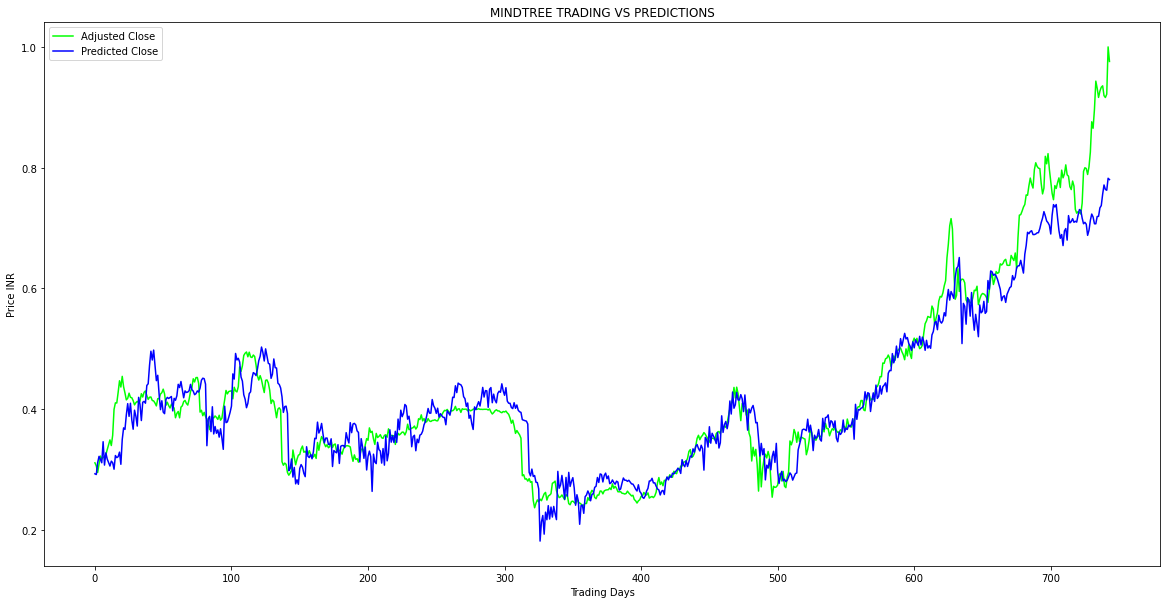

Standard Deviation of Error :  0.20051778408371937
Denormalised Standard Deviation :  383.9213752958933
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  1.0265770446150182
Train Score: 0.00122563 MSE (0.03500893 RMSE)
Test Score: 0.00225594 MSE (0.04749669 RMSE)
Epoch 1/50
63/63 [==============================] - 5s 46ms/step - loss: 0.0160 - val_loss: 2.0774e-04
Epoch 2/50
63/63 [==============================] - 2s 35ms/step - loss: 0.0023 - val_loss: 2.5589e-04
Epoch 3/50
63/63 [==============================] - 2s 35ms/step - loss: 0.0020 - val_loss: 3.2966e-04
Epoch 4/50
63/63 [==============================] - 2s 31ms/step - loss: 0.0016 - val_loss: 1.3408e-04
Epoch 5/50
63/63 [==============================] - 2s 28ms/step - loss: 0.0017 - val_loss: 4.8870e-04
Epoch 6/50
63/63 [==============================] - 2s 34ms/step - loss: 0.0022 - val_loss: 1.3687e-04
Epoch 7/50
63/63 [==============================] - 2s 35ms/step - loss: 0.0018 - val_loss:

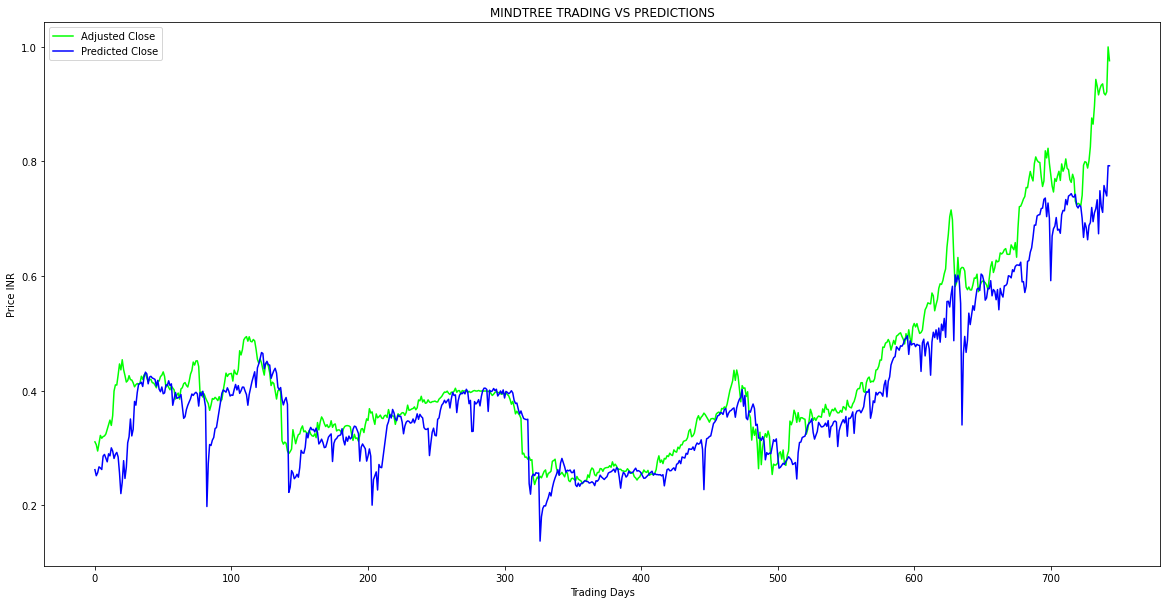

Standard Deviation of Error :  0.2025060038739937
Denormalised Standard Deviation :  387.7281203173421
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  1.0367559961013997
Train Score: 0.00119619 MSE (0.03458603 RMSE)
Test Score: 0.00358175 MSE (0.05984776 RMSE)
Epoch 1/50
63/63 [==============================] - 5s 42ms/step - loss: 0.0163 - val_loss: 9.7495e-05
Epoch 2/50
63/63 [==============================] - 2s 32ms/step - loss: 0.0013 - val_loss: 1.6073e-04
Epoch 3/50
63/63 [==============================] - 2s 32ms/step - loss: 0.0017 - val_loss: 3.5510e-04
Epoch 4/50
63/63 [==============================] - 2s 28ms/step - loss: 0.0013 - val_loss: 2.7939e-04
Epoch 5/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0016 - val_loss: 3.8564e-04
Epoch 6/50
63/63 [==============================] - 1s 24ms/step - loss: 0.0015 - val_loss: 1.1464e-04
Epoch 7/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0014 - val_loss: 

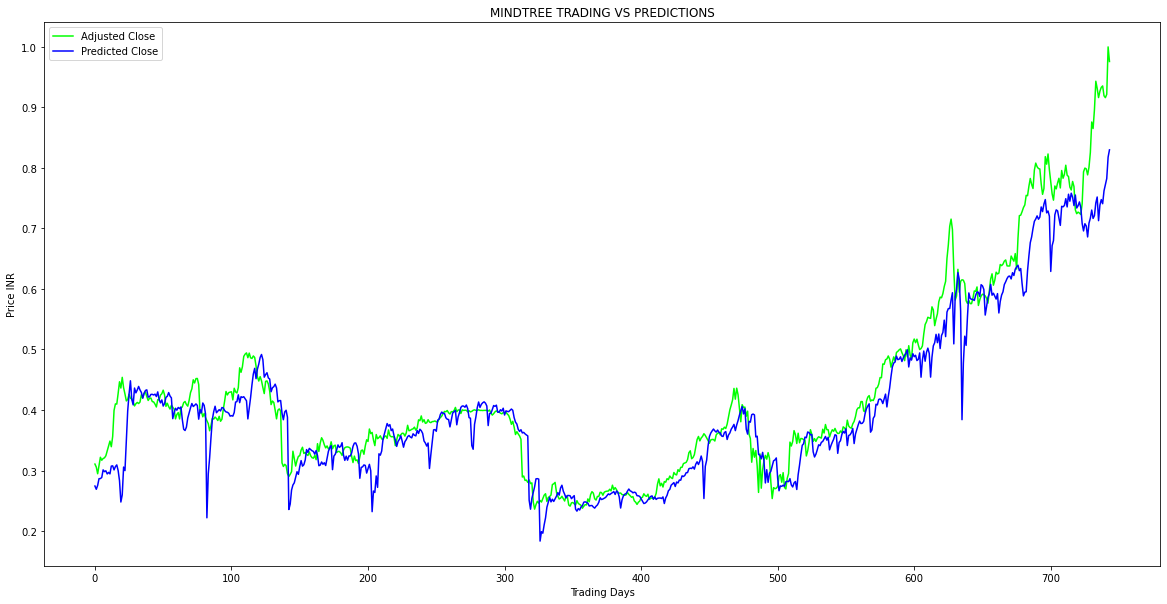

Standard Deviation of Error :  0.20414129735398348
Denormalised Standard Deviation :  390.8591349788045
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  1.0451280951420774
Train Score: 0.00122424 MSE (0.03498915 RMSE)
Test Score: 0.00240668 MSE (0.04905793 RMSE)


In [13]:
#TRAIN_SIMPLE_RNN_MODEL
model = build_model(input_dim = x_train.shape[-1], output_dim = unroll_length, return_sequences=True)
model.compile(loss = "mean_squared_error", optimizer = 'Adam')
model.fit(x_train, y_train, epochs =50, validation_split = 0.05)

preds = model.predict(x_test)
plot_prediction(y_test, preds)
err_stat(y_test,preds)

trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

#TRAIN_LSTM_MODEL
lstm_model = build_lstm_model(x_train.shape[-1], unroll_length, return_sequences = True)
lstm_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
lstm_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

preds_lstm = lstm_model.predict(x_test)
plot_prediction(y_test, preds_lstm)
err_stat(y_test,preds_lstm)

trainScore = lstm_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = lstm_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


#TRAIN_GRU_MODEL
gru_model = build_gru_model(x_train.shape[-1], unroll_length, return_sequences = True)
gru_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
gru_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

preds_gru = gru_model.predict(x_test)
plot_prediction(y_test, preds_gru)
err_stat(y_test,preds_gru)

trainScore = gru_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = gru_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))
